# Kaggle: Humpback Whale Identification Challenge

https://www.kaggle.com/c/whale-categorization-playground

In [2]:
import numpy as np

In [23]:
import csv
def load_labels(path):
    with open(path) as src:
        header = next(src)
        return list(csv.reader(src))

In [24]:
train = load_labels('./data/train.csv')

In [48]:
from collections import defaultdict
from collections import Counter

# число изображений для каждого идентифкатора
whale_samples = Counter(map(lambda e: e[1], train)).most_common()

# группируем изображения по идентификатору кита
whale_imgs = defaultdict(list)
for img, whale_id in train:
    whale_imgs[whale_id].append(img)

In [49]:
print('Train examples: %d' % len(train))
print('Unique whales: %d' % len(whale_samples))

Train examples: 9850
Unique whales: 4251


## Распределение числа изображений для каждого кита

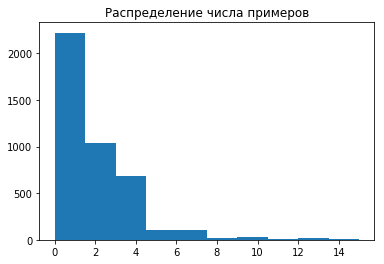

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.hist(list(map(lambda e: e[1], whale_samples[1:])), range = (0, 15))
plt.title('Распределение числа примеров')
plt.show()

## Выводим изображения китов

In [78]:
import cv2

def plot_whale_imgs(whale_id, max_plots = 5):
    imgs = whale_imgs[whale_id]
    plots = min(max_plots, len(imgs))

    fig, ax = plt.subplots(nrows = plots, 
                           ncols = 1, 
                           figsize = (50, 40))
    
    for i in range(plots):
        img = plt.imread('./data/train/%s' % imgs[i])
        ax[i].imshow(img)
        ax[i].set_title('%s %dx%dx%d' % (whale_id, 
                                         img.shape[0], 
                                         img.shape[1], 
                                         img.shape[2]))

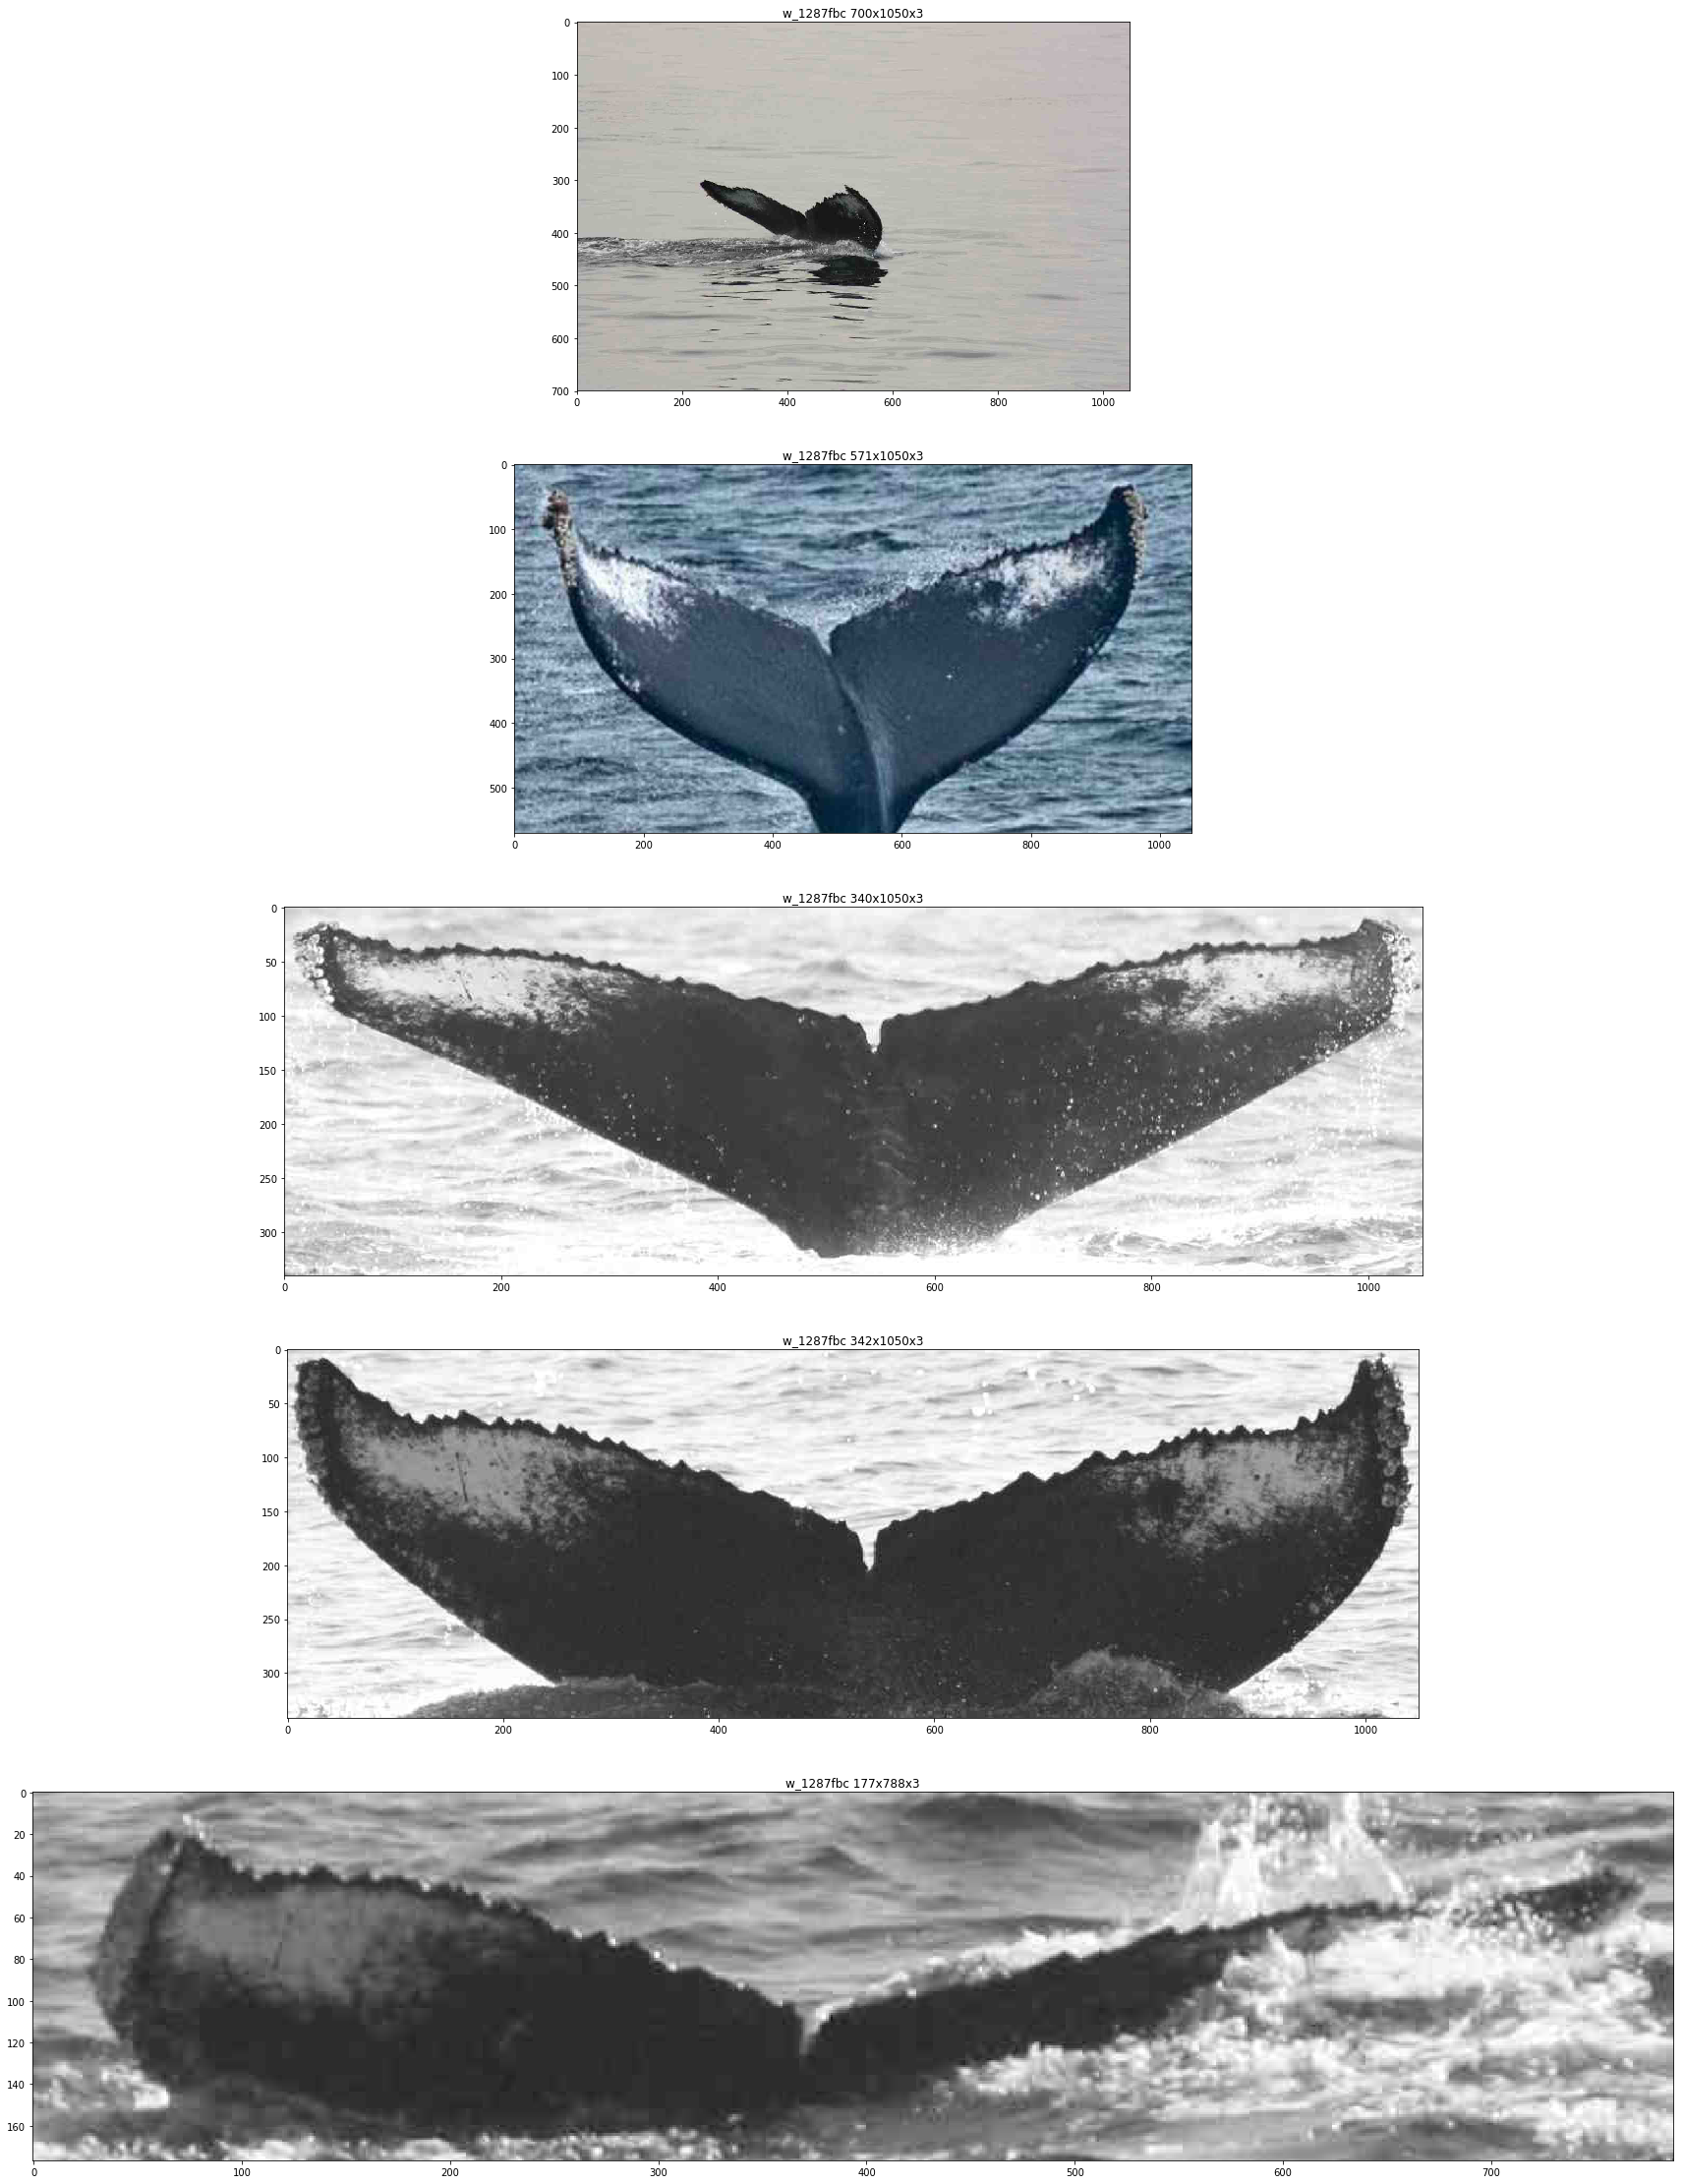

In [79]:
plot_whale_imgs(whale_id = whale_samples[1][0])

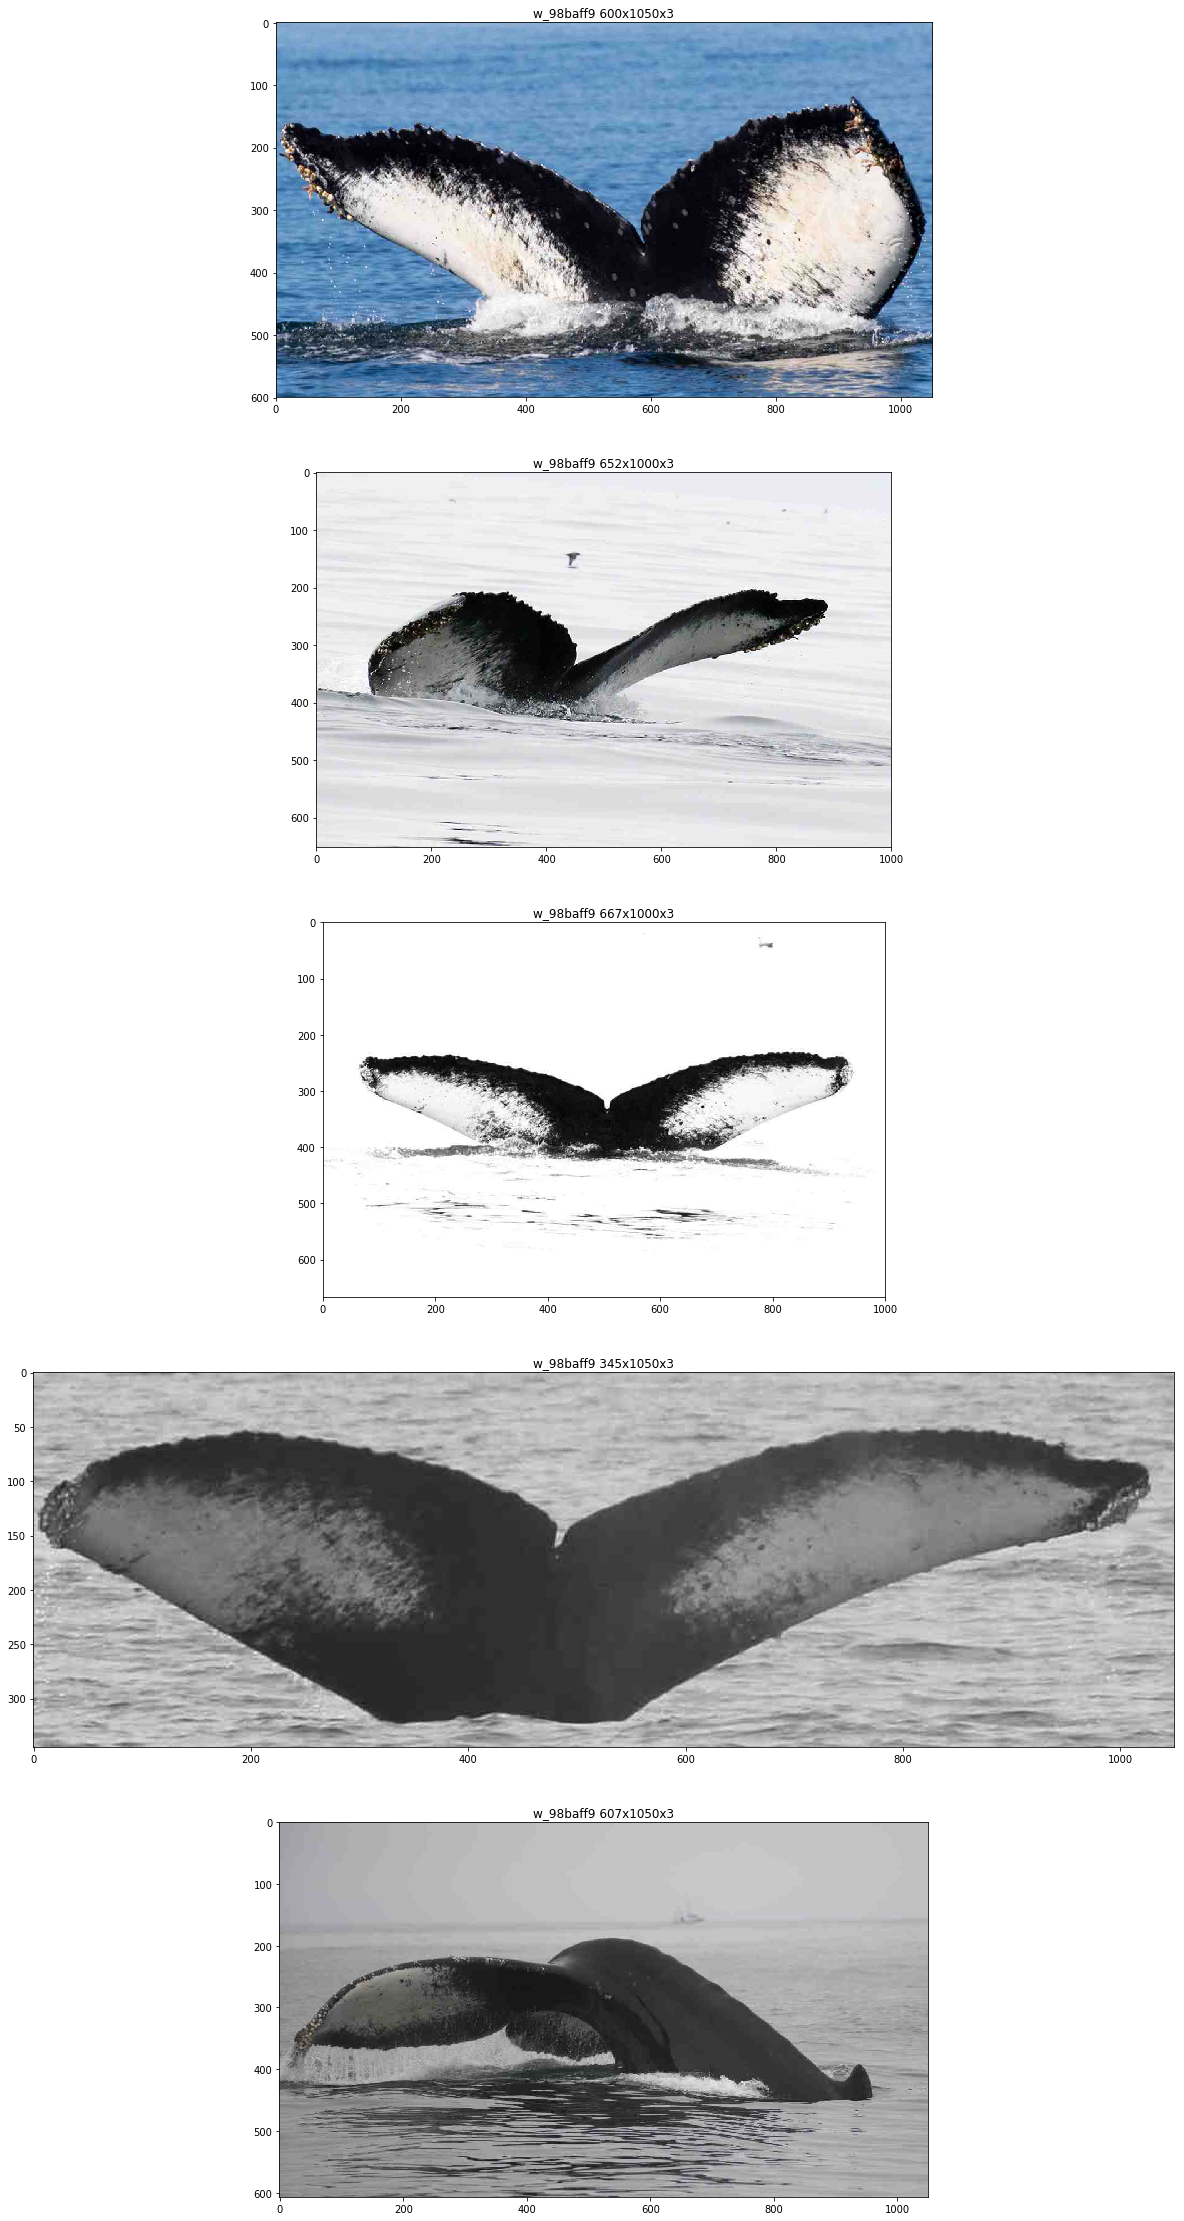

In [80]:
plot_whale_imgs(whale_id = whale_samples[2][0])